In [1]:
import xml.etree.ElementTree as ET
import pandas as pd


In [2]:
tree = ET.parse('../data/raw/559-ws-training.xml')
root = tree.getroot()

data = []

for event in root.find('glucose_level'):
    timestamp = event.get('ts')
    value = float(event.get('value'))
    data.append({'timestamp': timestamp, 'value': value})

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M:%S')
df.set_index('timestamp', inplace=True)

print(df)

                     value
timestamp                 
2021-12-07 01:17:00  101.0
2021-12-07 01:22:00   98.0
2021-12-07 01:27:00  104.0
2021-12-07 01:32:00  112.0
2021-12-07 01:37:00  120.0
...                    ...
2022-01-17 23:36:00  161.0
2022-01-17 23:41:00  164.0
2022-01-17 23:46:00  168.0
2022-01-17 23:51:00  172.0
2022-01-17 23:56:00  176.0

[10796 rows x 1 columns]


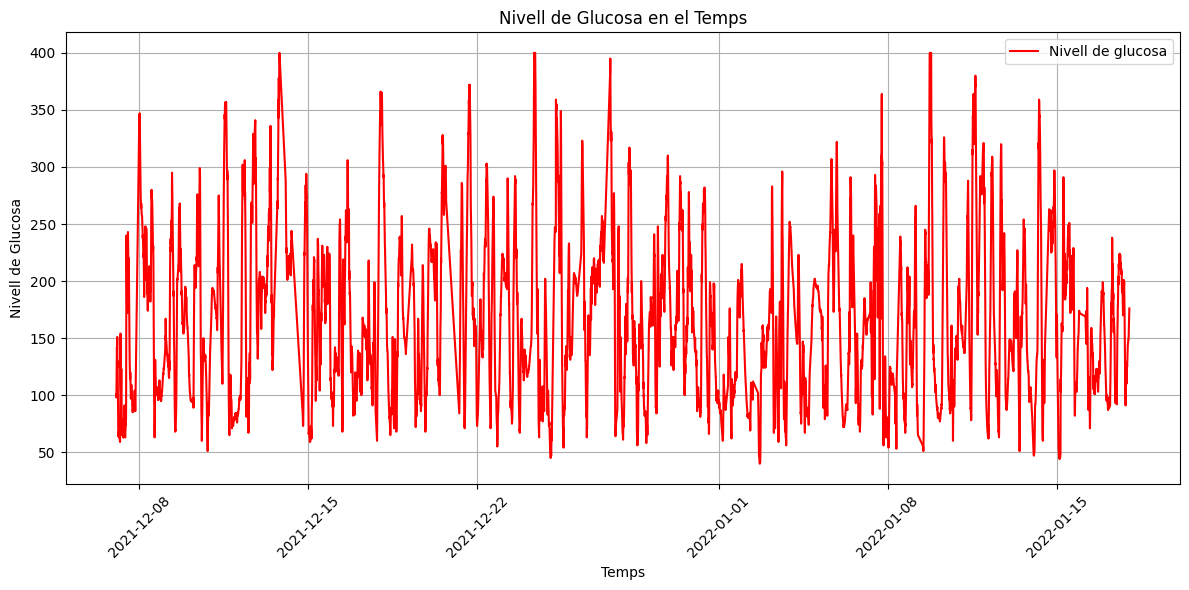

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], linestyle='-', color='r', label='Nivell de glucosa')
plt.title('Nivell de Glucosa en el Temps')
plt.xlabel('Temps')
plt.ylabel('Nivell de Glucosa')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

df_reset = df.copy()
df_reset['ds'] = df_reset.index

df_reset.rename(columns={'value': 'y'}, inplace=True)

df_reset['unique_id'] = 'series_1'  # O qualsevol identificador que vulguis

df_final = df_reset[['unique_id', 'ds', 'y']]

df_final['ds'] = pd.to_datetime(df_final['ds'])

print(df_final.head())


                    unique_id                  ds      y
timestamp                                               
2021-12-07 01:17:00  series_1 2021-12-07 01:17:00  101.0
2021-12-07 01:22:00  series_1 2021-12-07 01:22:00   98.0
2021-12-07 01:27:00  series_1 2021-12-07 01:27:00  104.0
2021-12-07 01:32:00  series_1 2021-12-07 01:32:00  112.0
2021-12-07 01:37:00  series_1 2021-12-07 01:37:00  120.0


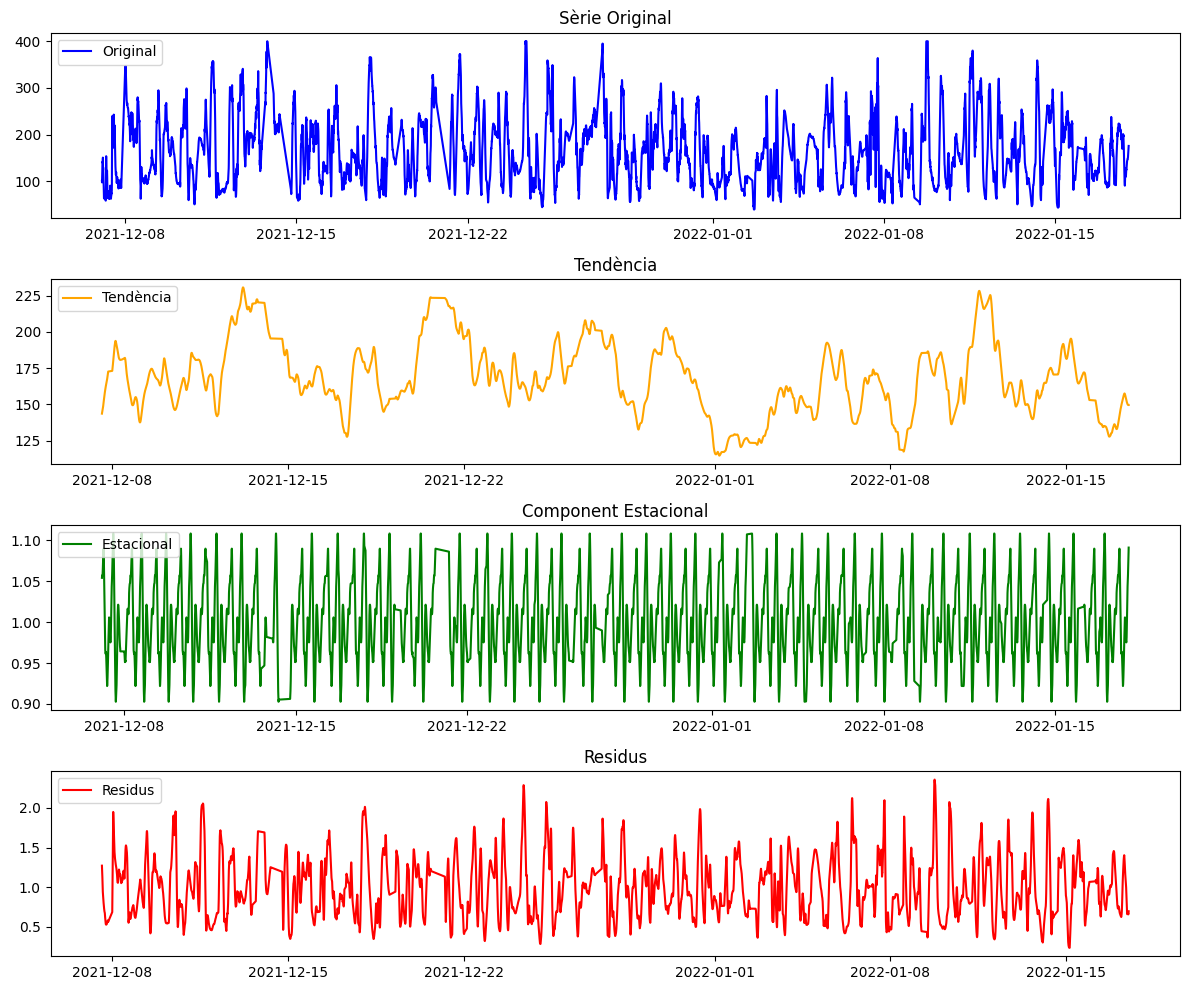

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

series_id = 'series_1'
df_series = df_final[df_final['unique_id'] == series_id].set_index('ds')

df_series['y_suau'] = df_series['y'].rolling(window=12).mean()
decomposition = seasonal_decompose(df_series['y_suau'].dropna(), model='multiplicative', period=288)

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df_series['y'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Sèrie Original')

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendència', color='orange')
plt.legend(loc='upper left')
plt.title('Tendència')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacional', color='green')
plt.legend(loc='upper left')
plt.title('Component Estacional')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residus', color='red')
plt.legend(loc='upper left')
plt.title('Residus')

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

series_id = 'series_1'
df_series = df_final[df_final['unique_id'] == series_id].set_index('ds')

print("Nombre de NaN abans d'implementar:", df_series['y'].isna().sum())

df_series['y'] = df_series['y'].interpolate(method='linear')
print("Nombre de NaN després d'implementar:", df_series['y'].isna().sum())

df_series['y'].fillna(0, inplace=True)  # Omplir amb 0

# Comprovar el resultat
print(df_series.head())


Nombre de NaN abans d'implementar: 0
Nombre de NaN després d'implementar: 0
                    unique_id      y
ds                                  
2021-12-07 01:17:00  series_1  101.0
2021-12-07 01:22:00  series_1   98.0
2021-12-07 01:27:00  series_1  104.0
2021-12-07 01:32:00  series_1  112.0
2021-12-07 01:37:00  series_1  120.0


/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_8801/3738139093.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_series['y'].fillna(0, inplace=True)  # Omplir amb 0


In [17]:
print(df_series)

                    unique_id      y
ds                                  
2021-12-07 01:17:00  series_1  101.0
2021-12-07 01:22:00  series_1   98.0
2021-12-07 01:27:00  series_1  104.0
2021-12-07 01:32:00  series_1  112.0
2021-12-07 01:37:00  series_1  120.0
...                       ...    ...
2022-01-17 23:36:00  series_1  161.0
2022-01-17 23:41:00  series_1  164.0
2022-01-17 23:46:00  series_1  168.0
2022-01-17 23:51:00  series_1  172.0
2022-01-17 23:56:00  series_1  176.0

[10796 rows x 2 columns]


Nombre de NaN abans d'implementar: 0
Nombre de NaN després d'implementar: 0


/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_8801/343494000.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_series['y'].fillna(method='ffill', inplace=True)  # Forward Fill
/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_8801/343494000.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_series['y'].fillna(method='ffill', inplace=True)  # Forward Fill
/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipyk

AIC: 60034.672908102264


/Users/danasour/Library/Caches/pypoetry/virtualenvs/glusap-WFOim_Bi-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/danasour/Library/Caches/pypoetry/virtualenvs/glusap-WFOim_Bi-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/danasour/Library/Caches/pypoetry/virtualenvs/glusap-WFOim_Bi-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_8801/343494000.p

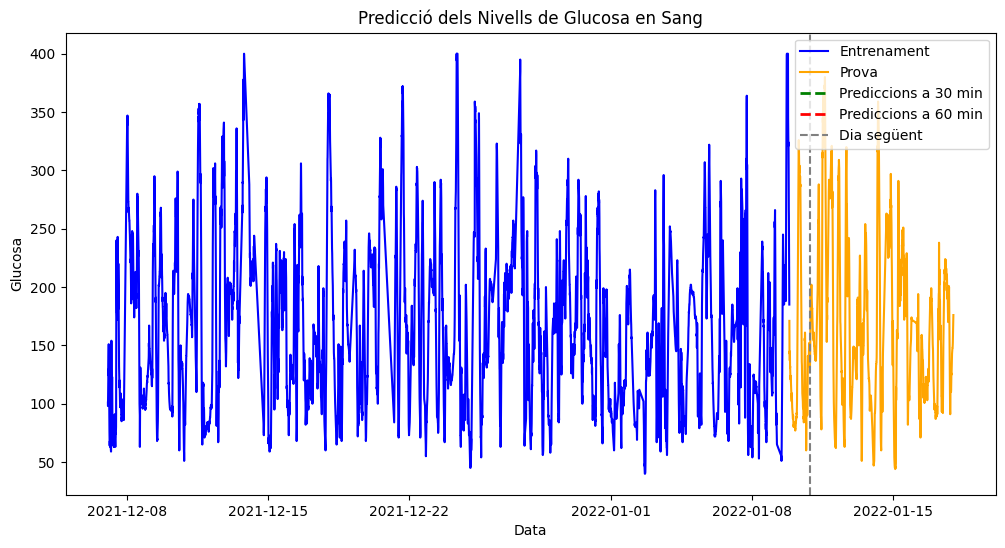

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


series_id = 'series_1'
df_series = df_final[df_final['unique_id'] == series_id].set_index('ds')

print("Nombre de NaN abans d'implementar:", df_series['y'].isna().sum())
df_series['y'] = df_series['y'].interpolate(method='linear')  # Interpolació
df_series['y'].fillna(method='ffill', inplace=True)  # Forward Fill
df_series['y'].fillna(0, inplace=True)  # Omplir amb 0 si encara queden NaN
print("Nombre de NaN després d'implementar:", df_series['y'].isna().sum())

train_size = int(len(df_series) * 0.8)  # 80% per entrenar
train, test = df_series['y'][:train_size], df_series['y'][train_size:]

model = ARIMA(train, order=(2, 1, 2))  # Prova amb paràmetres (p,d,q)
model_fit = model.fit()
print(f"AIC: {model_fit.aic}")

pred_30_min = model_fit.forecast(steps=6)  # 30 minuts (6 intervals de 5 minuts)
pred_60_min = model_fit.forecast(steps=12)  # 60 minuts (12 intervals de 5 minuts)

predictions = pd.DataFrame({
    '30_min_pred': pred_30_min,
    '60_min_pred': pred_60_min
}, index=pd.date_range(start=test.index[0], periods=len(pred_30_min), freq='5T'))

end_date = test.index[0] + pd.Timedelta(days=1)  # Dia següent
predictions_filtered = predictions[predictions.index < end_date]

plt.figure(figsize=(12, 6))
plt.plot(df_series.index[:train_size], train, label='Entrenament', color='blue')
plt.plot(df_series.index[train_size:], test, label='Prova', color='orange')

if not predictions_filtered.empty:  # Comprovar si hi ha prediccions
    plt.plot(predictions_filtered.index[:6], predictions_filtered['30_min_pred'][:6], 
             label='Prediccions a 30 min', color='green', linestyle='--', linewidth=2)
    plt.plot(predictions_filtered.index[:12], predictions_filtered['60_min_pred'][:12], 
             label='Prediccions a 60 min', color='red', linestyle='--', linewidth=2)

plt.axvline(x=end_date, color='grey', linestyle='--', label='Dia següent')
plt.legend()
plt.title('Predicció dels Nivells de Glucosa en Sang')
plt.xlabel('Data')
plt.ylabel('Glucosa')
plt.show()
